In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

figsize(10, 6)

In [2]:
length = 2
angle = 45

nail_x = -0.2
nail_y = -1.2

g = 9.8

dt = 0.01
t_limit = 5

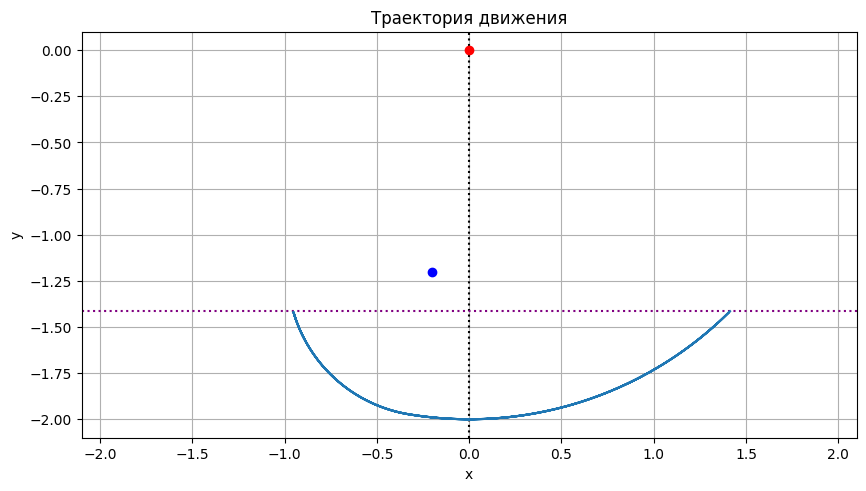

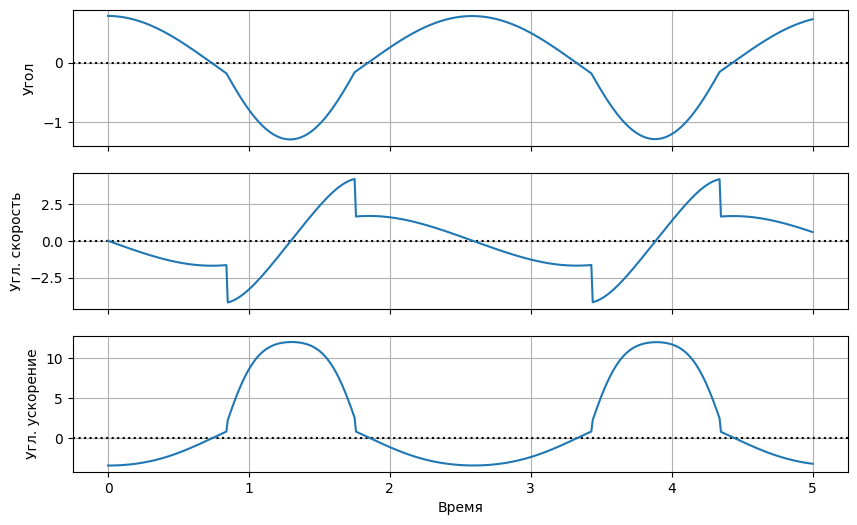

In [3]:
coef = 1 if nail_x > 0 else -1

theta = np.deg2rad(-coef * angle)
theta_d = 0
theta_dd = -g * np.sin(theta) / length
t = 0
length_nail = length - np.sqrt(nail_x**2 + nail_y**2)
angle_nail = np.arctan(nail_x / abs(nail_y))
length_diff = length / length_nail
is_nail = 0
r = length

theta_list = list()
theta_d_list = list()
theta_dd_list = list()
x_list = list()
y_list = list()

while t < t_limit:
    theta_list.append(theta)
    theta_d_list.append(theta_d)
    theta_dd_list.append(theta_dd)

    if is_nail and theta * coef < angle_nail * coef:  # вышли
        r = length
        theta_d /= length_diff
        is_nail = 0

    elif not is_nail and theta * coef >= angle_nail * coef:  # вошли
        r = length_nail
        theta_d *= length_diff
        is_nail = 1
    
    x_list.append(is_nail * nail_x + r * np.sin(theta))
    y_list.append(is_nail * nail_y - r * np.cos(theta))

    theta_dd = -g * np.sin(theta) / r
    theta_d += theta_dd * dt
    theta += theta_d * dt
    t += dt

t_list = [i * dt for i in range(len(theta_list))]

plt.axvline(x=0, color='black', linestyle=':')
plt.axhline(y=max(y_list), color='purple', linestyle=':')
plt.plot(x_list, y_list)
plt.plot([0], [0], color='red', marker='o')
plt.plot([nail_x], [nail_y], color='blue', marker='o')
plt.title('Траектория движения')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.gca().set_aspect('equal')
plt.xlim(-length * 1.05, length * 1.05)
plt.show()

fig, axs = plt.subplots(3, sharex=True)

axs[0].axhline(y=0, color='black', linestyle=':')
axs[0].plot(t_list, theta_list)
axs[0].grid()
plt.setp(axs[0], ylabel='Угол')

axs[1].axhline(y=0, color='black', linestyle=':')
axs[1].plot(t_list, theta_d_list)
axs[1].grid()
plt.setp(axs[1], ylabel='Угл. скорость')

axs[2].axhline(y=0, color='black', linestyle=':')
axs[2].plot(t_list, theta_dd_list)
axs[2].grid()
plt.setp(axs[2], ylabel='Угл. ускорение')

plt.setp(axs[2], xlabel='Время')

plt.show()
